# Assignment 10

In [1]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 0.62762233],
       [ 1.22427534],
       [-0.32425294],
       ...,
       [ 0.02765834],
       [ 0.85807588],
       [ 1.41865562]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.37762233],
       [1.97427534],
       [0.42574706],
       ...,
       [0.77765834],
       [1.60807588],
       [2.16865562]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.08722188],
       [1.44055997],
       [0.18139926],
       ...,
       [0.52765482],
       [1.25658579],
       [1.48844891]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:[0.99817151]
Weight_2:0.9595257412682243
Bias:1.0


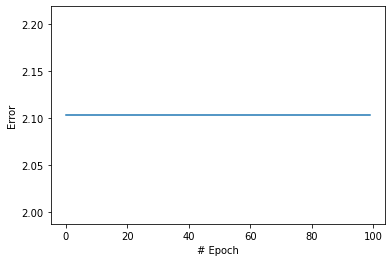

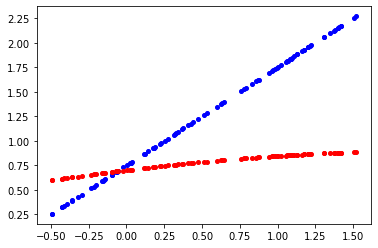


Imitation of formula 'sin(x)+0.5'
Weight_1:[0.99817151]
Weight_2:0.9595257412682243
Bias:1.0


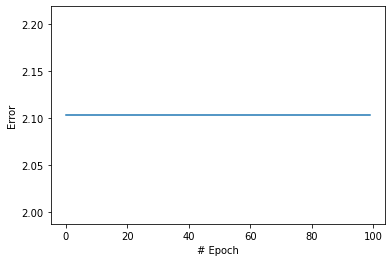

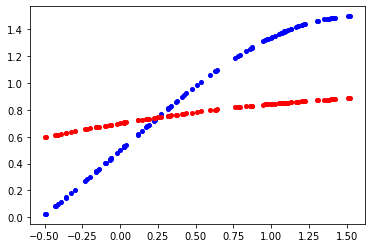

In [11]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    
    def sig_derivative(self,X):
        return X * (1-X)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        self.hidden= self.sigmoid(np.dot(self.X,self.weight_1) + self.bias)
        self.output= np.dot(self.hidden,self.weight_2)
        self.error= 0.5* ((self.y - self.output))**2
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2

        #print("TODO (a)") # remove this line, just here to produce no compile error in initial setup
      
    # (b) Back-propagation pass
    def back_prop(self):
        self.out= (self.y - self.output)
        d= np.dot(self.out,self.weight_2)
        self.weight_2 += -0.01*d
        self.hidde= [d * self.sig_derivative(self.output)]
        de= np.dot(self.hidde,self.weight_1)
        self.weight_1 += -0.01 * de
        
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        #print("TODO (b)") # remove this line, just here to produce no compile error in initial setup
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):

        
        # Example use of neural network class
        nn = NeuralNetwork() # instantiates neural network
        nn.set_sample(2,5) # sets sample with 2 as input and 5 as target
        nn.feed_forward() # perform feed-forward to calculate output
        nn.back_prop() # use difference between target and actual output to update parameters
        epoch_error.append(nn.error)
        #Remember final error of each epoch in "epoch_error"
        #print("TODO (c)") # remove this line, just here to produce no compile error in initial setup
        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)